Package imports

In [1]:
import sys  
sys.path.insert(0, '/Users/caiorego/Desktop/BDS/RA/Seeding-Bandits/')

In [2]:
import src.utils
from src.utils import import_dta, import_tracks_dta, successful_creators_followers,\
gen_active_relations, get_fan_interactions_per_week, calculate_avg_monthly_valence,\
gen_active_relations_prob, get_fan_interactions_per_week_prob, stripplot_prob,\
reaction_probability, follower_list, filter_quantile, sample_creators_music
import datetime
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mstats
pd.plotting.register_matplotlib_converters()

In [3]:
path_dir = r"/Users/../Volumes/Raw/"

Data imports

In [4]:
#we will skip comments for now

#affiliations :follows
#favoritings :likes

tracks = import_tracks_dta(path_dir, "12sample_tracks.dta");
follows_sent = import_dta(path_dir, "12sample_affiliations_sent.dta");
comments_sent = import_dta(path_dir, "12sample_comments_made.dta");
shares_sent = import_dta(path_dir, "12sample_reposts_made.dta");
likes_sent = import_dta(path_dir, "12sample_favoritings_made.dta");

user_info = import_dta(path_dir, "12sample_user_infos.dta");


########
follows_received = import_dta(path_dir, "12sample_affiliations_received.dta");
comments_received = import_dta(path_dir, "12sample_comments_received.dta");
shares_received = import_dta(path_dir, "12sample_reposts_received.dta");
likes_received = import_dta(path_dir, "12sample_favoritings_received.dta");

%%%%%%%%%% 12sample_tracks.dta %%%%%%%%%%
(56262, 7)
%%%%%%%%%% 12sample_affiliations_sent.dta %%%%%%%%%%
(800913, 3)
%%%%%%%%%% 12sample_comments_made.dta %%%%%%%%%%
(29258, 4)
%%%%%%%%%% 12sample_reposts_made.dta %%%%%%%%%%
(179329, 4)
%%%%%%%%%% 12sample_favoritings_made.dta %%%%%%%%%%
(527701, 4)
%%%%%%%%%% 12sample_user_infos.dta %%%%%%%%%%
(35000, 3)
%%%%%%%%%% 12sample_affiliations_received.dta %%%%%%%%%%
(432503, 3)
%%%%%%%%%% 12sample_comments_received.dta %%%%%%%%%%
(21386, 4)
%%%%%%%%%% 12sample_reposts_received.dta %%%%%%%%%%
(83013, 4)
%%%%%%%%%% 12sample_favoritings_received.dta %%%%%%%%%%
(286903, 4)


<font size = 8>Reaction probability analysis: All fans</font>

<font size = 4>The first step in the analysis is to produce the 'success rule'. The present analysis is based on the number of followers a creator obtained up until the 12th month in the platform:</font>

In [5]:
#Creators and their followers's number (based on followers up until month 12)
followers_per_creator = successful_creators_followers(follows_received, 12)


2014-02-24 00:00:00


<font size = 4>Below, the reaction probability per creator is calculated: A reaction is an interaction from the fan towards the creator, that follows an action by the creator. The interval between interactions must be of a maximum of 7 days, otherwise the reaction is disconsidered. The activities considered here are follows, shares, likes and comments.
    
<font size = 4>The reaction probability is calculated at different point in time: the first, third, 6th, 9th and 12th month.</font>

In [6]:
df1_prob = reaction_probability(1,follows_sent, shares_sent, likes_sent, comments_sent, tracks,\
                         follows_received, shares_received, likes_received, comments_received)
df3_prob = reaction_probability(3,follows_sent, shares_sent, likes_sent, comments_sent, tracks,\
                         follows_received, shares_received, likes_received, comments_received)
df6_prob = reaction_probability(6,follows_sent, shares_sent, likes_sent, comments_sent, tracks,\
                         follows_received, shares_received, likes_received, comments_received)
df9_prob = reaction_probability(9,follows_sent, shares_sent, likes_sent, comments_sent, tracks,\
                         follows_received, shares_received, likes_received, comments_received)
df12_prob = reaction_probability(12,follows_sent, shares_sent, likes_sent, comments_sent, tracks,\
                         follows_received, shares_received, likes_received, comments_received)

Active date:2013-03-31 00:00:00
Interaction date:2013-03-31 00:00:00
Active date:2013-05-30 00:00:00
Interaction date:2013-05-30 00:00:00
Active date:2013-08-28 00:00:00
Interaction date:2013-08-28 00:00:00
Active date:2013-11-26 00:00:00
Interaction date:2013-11-26 00:00:00
Active date:2014-02-24 00:00:00
Interaction date:2014-02-24 00:00:00


<font size = 4>Creator success dataset is merged to the reaction probability, so its possible to filter the dataset based on the deciles of the number of followers distribution.</font>

In [7]:
df1 = followers_per_creator.merge(df1_prob, how = "inner", left_on = ['user_id'], right_on = ['user_id'])
df3 = followers_per_creator.merge(df3_prob, how = "inner", left_on = ['user_id'], right_on = ['user_id'])
df6 = followers_per_creator.merge(df6_prob, how = "inner", left_on = ['user_id'], right_on = ['user_id'])
df9 = followers_per_creator.merge(df9_prob, how = "inner", left_on = ['user_id'], right_on = ['user_id'])
df12 = followers_per_creator.merge(df12_prob, how = "inner", left_on = ['user_id'], right_on = ['user_id'])

In [8]:
df1_f = filter_quantile(df1, 0.1, 0.9)
df3_f = filter_quantile(df3, 0.1, 0.9)
df6_f = filter_quantile(df6, 0.1, 0.9)
df9_f = filter_quantile(df9, 0.1, 0.9)
df12_f = filter_quantile(df12, 0.1, 0.9)

High influencer boundary: 73.0
Low influencer boundary: 2.0
High influencer boundary: 75.20000000000005
Low influencer boundary: 3.0
High influencer boundary: 76.89999999999998
Low influencer boundary: 3.0
High influencer boundary: 73.89999999999998
Low influencer boundary: 3.0
High influencer boundary: 73.0
Low influencer boundary: 3.0


<font size = 4>Now we move to visualizations: the reaction probability of creators on the high decile is crearly superior to the one of creators in the low decile (mind that the position of the categories change from plot to plot).</font>

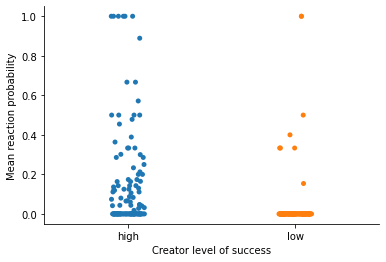

In [9]:
stripplot_prob(df1_f, 'Month_1_Prob')

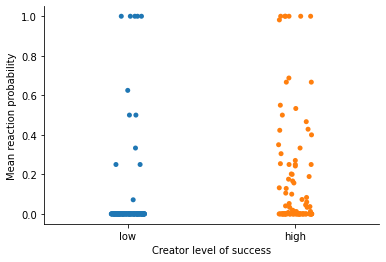

In [10]:
stripplot_prob(df3_f, 'Month_3_Prob')

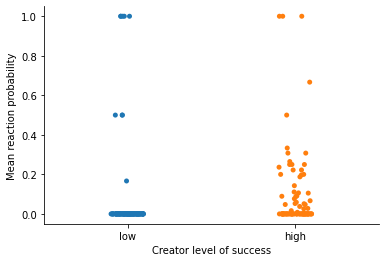

In [11]:
stripplot_prob(df6_f, 'Month_6_Prob')

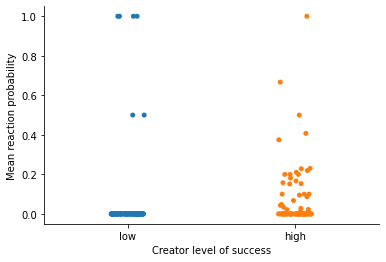

In [12]:
stripplot_prob(df9_f, 'Month_9_Prob')

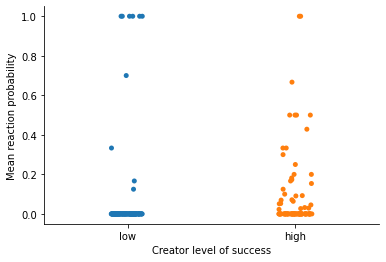

In [13]:
stripplot_prob(df12_f, 'Month_12_Prob')

<font size = 10><font size = 8>Reaction probability analysis: Fanbase only</font></font>

<font size = 4>Below we still analyze reaction probabilities between creators and fans, but we restrict the analysis to fanbase: we only look at interactions where the fan was already a follower when the creator performed the outbound activity. Activities considered for the reaction now disregard follows. </font>

In [14]:
df_1_fb = reaction_probability(1, follows_sent, shares_sent, likes_sent, comments_sent, user_info,
                         follows_received, shares_received, likes_received, comments_received, fanbase_analysis = True)
df_3_fb = reaction_probability(3, follows_sent, shares_sent, likes_sent, comments_sent, user_info,
                         follows_received, shares_received, likes_received, comments_received, fanbase_analysis = True)
df_6_fb = reaction_probability(6, follows_sent, shares_sent, likes_sent, comments_sent, user_info,
                         follows_received, shares_received, likes_received, comments_received, fanbase_analysis = True)
df_9_fb = reaction_probability(9, follows_sent, shares_sent, likes_sent, comments_sent, user_info,
                         follows_received, shares_received, likes_received, comments_received, fanbase_analysis = True)
df_12_fb = reaction_probability(12, follows_sent, shares_sent, likes_sent, comments_sent, user_info,
                         follows_received, shares_received, likes_received, comments_received, fanbase_analysis = True)

Active date:2013-03-31 00:00:00
Interaction date:2013-03-31 00:00:00
Obtaining fanbase...
Active date:2013-05-30 00:00:00
Interaction date:2013-05-30 00:00:00
Obtaining fanbase...
Active date:2013-08-28 00:00:00
Interaction date:2013-08-28 00:00:00
Obtaining fanbase...
Active date:2013-11-26 00:00:00
Interaction date:2013-11-26 00:00:00
Obtaining fanbase...
Active date:2014-02-24 00:00:00
Interaction date:2014-02-24 00:00:00
Obtaining fanbase...


<font size = 4> The code below merges the fanbase action/reactions data with the measure of creator success:

In [15]:
df_1 = followers_per_creator.merge(df_1_fb, how = "inner", left_on = ['user_id'], right_on = ['user_id'])
df_3 = followers_per_creator.merge(df_3_fb, how = "inner", left_on = ['user_id'], right_on = ['user_id'])
df_6 = followers_per_creator.merge(df_6_fb, how = "inner", left_on = ['user_id'], right_on = ['user_id'])
df_9 = followers_per_creator.merge(df_9_fb, how = "inner", left_on = ['user_id'], right_on = ['user_id'])
df_12 = followers_per_creator.merge(df_12_fb, how = "inner", left_on = ['user_id'], right_on = ['user_id'])

<font size = 4>Once more, the top and the bottom deciles are filtered.

In [16]:
df_1_f = filter_quantile(df_1, 0.1, 0.9)
df_3_f = filter_quantile(df_3, 0.1, 0.9)
df_6_f = filter_quantile(df_6, 0.1, 0.9)
df_9_f = filter_quantile(df_9, 0.1, 0.9)
df_12_f = filter_quantile(df_12, 0.1, 0.9)

High influencer boundary: 63.0
Low influencer boundary: 3.0
High influencer boundary: 80.0
Low influencer boundary: 3.0
High influencer boundary: 69.0
Low influencer boundary: 3.0
High influencer boundary: 71.0
Low influencer boundary: 3.0
High influencer boundary: 63.0
Low influencer boundary: 3.0


<font size = 4>The number of datapoints reduce starkly, as compared to the analysis not restricted to fanbase, but the reults points in the same direction: higher decile show a more responsive fanbase than lower decile.</font>

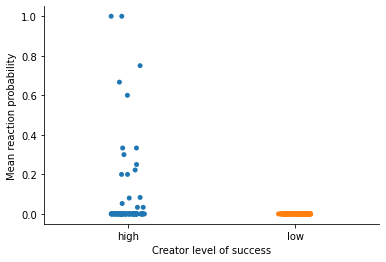

In [17]:
stripplot_prob(df_1_f, 'Month_1_Prob_fanbase')

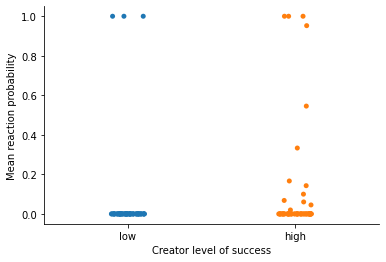

In [18]:
stripplot_prob(df_3_f, 'Month_3_Prob_fanbase')

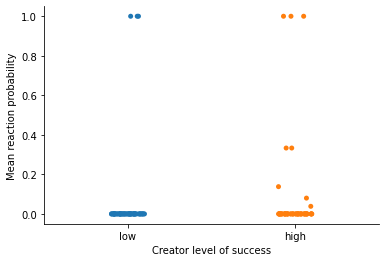

In [19]:
stripplot_prob(df_6_f, 'Month_6_Prob_fanbase')

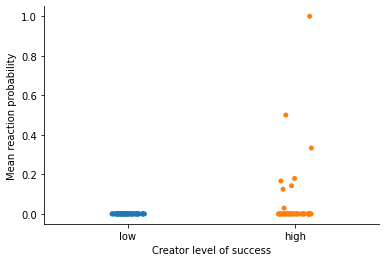

In [20]:
stripplot_prob(df_9_f, 'Month_9_Prob_fanbase')

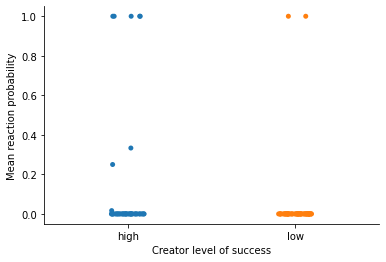

In [21]:
stripplot_prob(df_12_f, 'Month_12_Prob_fanbase')

In [22]:
tracks = import_tracks_dta(path_dir, "12sample_tracks.dta")

%%%%%%%%%% 12sample_tracks.dta %%%%%%%%%%
(56262, 7)


# 07-07-2022

# Descriptive Statistics

<font size = 4>We start by importing the necessary data:
<br>
`sent_actions` is a dataframe composed of actions sent by the creators.
<br>
`received_actions` is a dataframe composed of actions received by the creators.
<br>
`tracks_first_month` is a dataframe that we will in some analysis - it will allows us to filter creators that made tracks available right on the first month of sample.</font>

In [23]:
sent_reactions = src.utils.gen_outbound_creators(follows_sent, shares_sent, likes_sent, comments_sent, tracks)
received_reactions = src.utils.aggregate_received_interactions(follows_received, shares_received, likes_received, comments_received, tracks)
tracks_first_month = sample_creators_music(tracks, 30)
                                                

<font size = 4>We also create table with the number of followers per creator up until year five of the sample. It is named `followers_per_creator_60` - the 60 stands for the number of months since the start of the observed period.</font>

In [24]:
#follows per creator
followers_per_creator_60 = successful_creators_followers(follows_received, 60)

2018-02-03 00:00:00


The sent and received actions are preprocessed to represented the total count of each reaction per creator (`user_id`) per week of year. We conclude by concatenating those tables. Mind that the dataframe format is a stacked one, since it better sinergizes with the viasualization functions of `seaborn`.

In [25]:
received_reactions = received_reactions.groupby(['user_id', 'week_yr', 'inbound_activity'], as_index = False)\
.agg(count_interactions_week = ('fan_id','size'))

In [26]:
sent_reactions = sent_reactions.groupby(['user_id', 'week_yr', 'outbound_activity'], as_index = False)\
.agg(count_interactions_week = ('fan_id','size'))

In [27]:
sent_reactions['outbound_activity'] = sent_reactions.outbound_activity.apply(lambda x : "{}_sent".format(x))
received_reactions['inbound_activity'] = received_reactions.inbound_activity.apply(lambda x : "{}_received".format(x))

In [28]:
sent_reactions.columns = ['user_id', 'week_yr', 'activity','count_interactions_week']
received_reactions.columns = ['user_id', 'week_yr', 'activity','count_interactions_week']
general_reactions = pd.concat([sent_reactions, received_reactions], ignore_index=True)

<font size = 4>Lets create a grid, so we guarantee that weeks where creators are inactive are also present in the descriptive statistics:
<br>
<font size = 4 color = 'red'> The Grid approach made it such that over 90% of the week interaction counts were equal to 0. That pushed all descriptive statistics towards 0. How to proceed? Do analysis only on weeks where interactions happened (like the following one?)
</font>

In [29]:
# creators = tracks.user_id.unique()
# weeks = pd.date_range(datetime.datetime(2013, 3, 1, 0, 0, 0),datetime.datetime(2015, 8, 1, 0, 0, 0),freq='w')
# actions = ['follow_sent', 'follow_received',
#               'comment_sent', 'comment_received', 
#               'share_sent', 'share_received',
#               'like_sent', 'like_received']

In [30]:
# grid_tentative = [(week, user_id, action) for week in weeks for user_id in creators for action in actions]
# df_grid = pd.DataFrame(grid_tentative, columns =['week', 'user_id', 'activity'])
# df_grid['interaction_week'] = df_grid.week.apply(lambda x: x.week)
# df_grid['interaction_year'] = df_grid.week.apply(lambda x: x.year)
# df_grid['week_yr'] = pd.to_datetime(df_grid['interaction_year'].astype(str) + ' ' + df_grid['interaction_week'].astype(str) + ' 1',
#                                 format='%Y %U %w')
# general_reactions = df_grid.merge(general_reactions, left_on = ['user_id', 'week_yr', 'activity'], 
#               right_on = ['user_id', 'week_yr', 'activity'], how = 'left')

# general_reactions.fillna(value = 0, inplace = True)


## First things first

<font size = 4>In the table that follows, the data is described by count, mean, standard deviation and Tukey's 5 Numbers (the minimum and the quartiles). The figures are relative to weekly actions sent and received per creator.
<br>
Creators send follows more commonly than they receive it, while fans seem to use likes and shares more often then the other actions.
<br>
</font>

To do:
fix: Reactions that did not happen in a week are not averaged
#idea: create a user_id x week grid

In [31]:
round(general_reactions.groupby('activity').count_interactions_week.describe().T,1)

activity,comment_received,comment_sent,follow_received,follow_sent,like_received,like_sent,share_received,share_sent
count,6953.0,8099.0,274443.0,38192.0,34014.0,39698.0,13472.0,16670.0
mean,2.6,2.1,1.6,7.2,8.3,4.0,6.1,3.5
std,6.0,4.5,4.2,32.8,34.3,6.7,20.1,5.9
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0
75%,2.0,2.0,1.0,4.0,4.0,4.0,3.0,4.0
max,200.0,305.0,628.0,1882.0,1039.0,230.0,428.0,115.0


<font size = 4>Now we move to a visualization of those figures through a box-plot. Before drawing the plot, we winsorized the data in the percentiles 5 and 95 - otherwise the extreme values would dominate the plot.</font>

In [32]:
filter_val = ['follow_sent', 'follow_received',
              'comment_sent', 'comment_received', 
              'share_sent', 'share_received',
              'like_sent', 'like_received']
winsor_general_reactions = general_reactions.copy()

winsorized_data = {}
for val in filter_val:
    mask = general_reactions.activity.isin([val])
    winsor_general_reactions.loc[mask ,'count_interactions_week'] = mstats.winsorize(winsor_general_reactions[mask]['count_interactions_week'], inplace = False, limits=[0.05, 0.05])
                                        

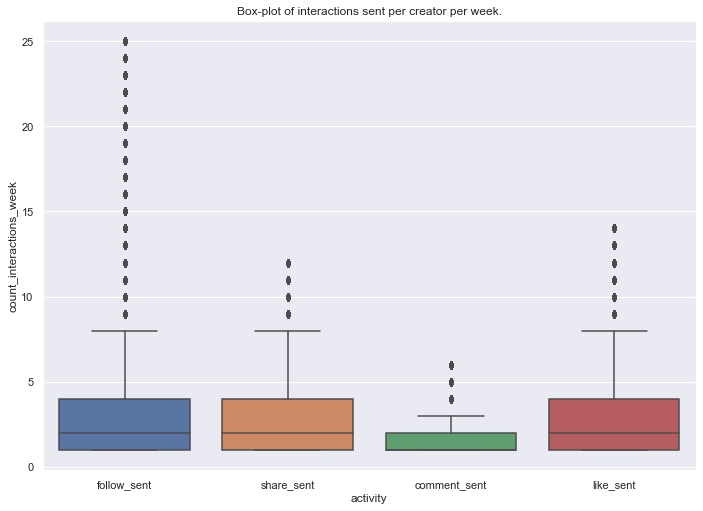

In [34]:
filter_val = ['follow_sent', 'share_sent', 'comment_sent', 'like_sent']
mask = winsor_general_reactions.activity.isin(filter_val)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data = winsor_general_reactions[mask],
             y = 'count_interactions_week',  
             x = 'activity').set(title='Box-plot of interactions sent per creator per week.');

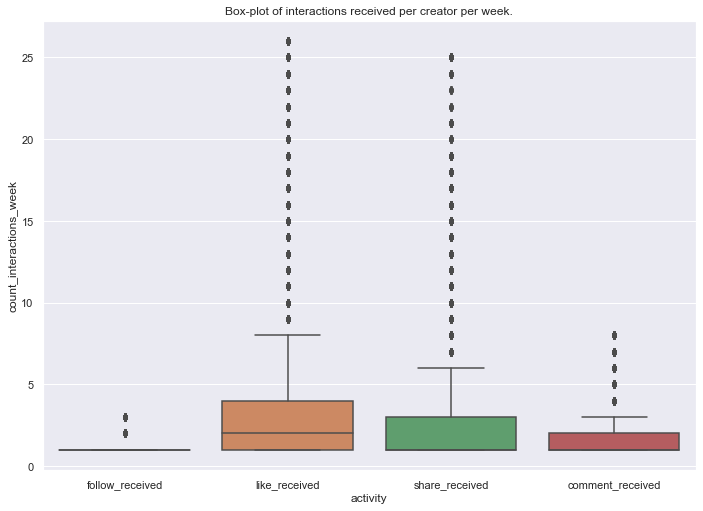

In [35]:
filter_val = ['follow_received', 'share_received', 'comment_received', 'like_received']
mask = winsor_general_reactions.activity.isin(filter_val)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data = winsor_general_reactions[mask],
             y = 'count_interactions_week',  
             x = 'activity').set(title='Box-plot of interactions received per creator per week.');

## Descriptive Statistics : high and low decile based on number of followers + made track available on the first month.

<font size = 4>Now let's redo the analysis, but filtering only the top and bottom decile of creators based their followers. We will also get rid of creators that did not made a track available on the first month.
<br>
We start by showing some simple descriptive statistics of that distribution:</font>

In [36]:
followers_per_creator_60.followers.describe().to_frame()

,followers
count,21616.000000
mean,20.007911
std,102.076983
min,1.000000
25%,3.000000
50%,8.000000
75%,20.000000
max,12298.000000


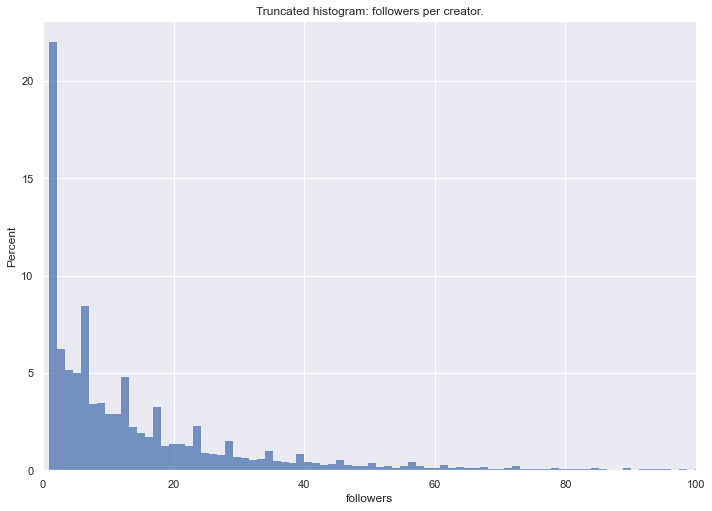

In [37]:
sns.histplot(data= followers_per_creator_60, x = 'followers', stat = 'percent').set(xlim=(0,100),
            title = 'Truncated histogram: followers per creator.');

In [38]:
general_reactions = general_reactions.merge(followers_per_creator_60, left_on = 'user_id', right_on = 'user_id')
general_reactions_filtered = filter_quantile(general_reactions, 0.1, 0.9)

High influencer boundary: 178.0
Low influencer boundary: 7.0


In [39]:
mask = general_reactions_filtered.user_id.isin(tracks_first_month.user_id) 
general_reactions_filtered = general_reactions_filtered[mask]

In [40]:
general_reactions_filtered.shape

(40233, 6)

<font size = 4>The table shows individuals that are, on average, more active than when 'high' and 'low' success creators are present in the analysis. This is mainly due to 'high' success creators.
</font>

In [41]:
round(general_reactions_filtered.groupby('activity').count_interactions_week.describe().T,1)

activity,comment_received,comment_sent,follow_received,follow_sent,like_received,like_sent,share_received,share_sent
count,2248.0,1540.0,13263.0,5273.0,8056.0,4369.0,3739.0,1745.0
mean,4.5,3.2,5.7,14.7,18.4,4.8,13.0,5.4
std,9.8,9.1,16.4,65.0,62.4,9.2,35.0,10.9
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
75%,4.0,3.0,4.0,7.0,6.0,4.0,5.0,4.0
max,200.0,305.0,628.0,1882.0,1039.0,109.0,428.0,106.0


In [42]:
filter_val = ['follow_sent', 'follow_received',
              'comment_sent', 'comment_received', 
              'share_sent', 'share_received',
              'like_sent', 'like_received']
winsor_general_reactions = general_reactions_filtered.copy()

winsorized_data = {}
for val in filter_val:
    mask = general_reactions.activity.isin([val])
    winsor_general_reactions.loc[mask ,'count_interactions_week'] = mstats.winsorize(winsor_general_reactions[mask]['count_interactions_week'], inplace = False, limits=[0.05, 0.05])
                                        

/var/folders/f2/cgjzt69n5hlgmtsm36p1pztw0000gn/T/ipykernel_14343/1787239402.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  winsor_general_reactions.loc[mask ,'count_interactions_week'] = mstats.winsorize(winsor_general_reactions[mask]['count_interactions_week'], inplace = False, limits=[0.05, 0.05])


<font size = 4>
The box-plots shows a clear distinction between creators in the top and in the bottom decile: the upper decile sends and receives considerably more actions.</font>

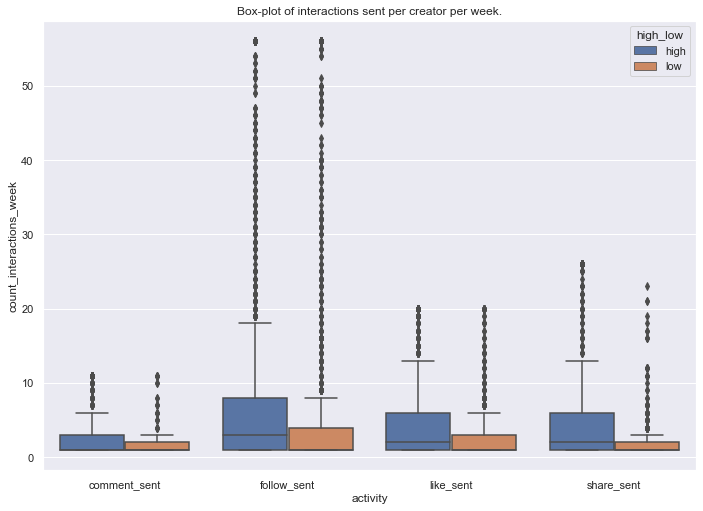

In [43]:
filter_val = ['follow_sent', 'share_sent', 'comment_sent', 'like_sent']
mask = winsor_general_reactions.activity.isin(filter_val)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data = winsor_general_reactions[mask],
             y = 'count_interactions_week',  
             x = 'activity',
             hue = 'high_low').set(title='Box-plot of interactions sent per creator per week.');

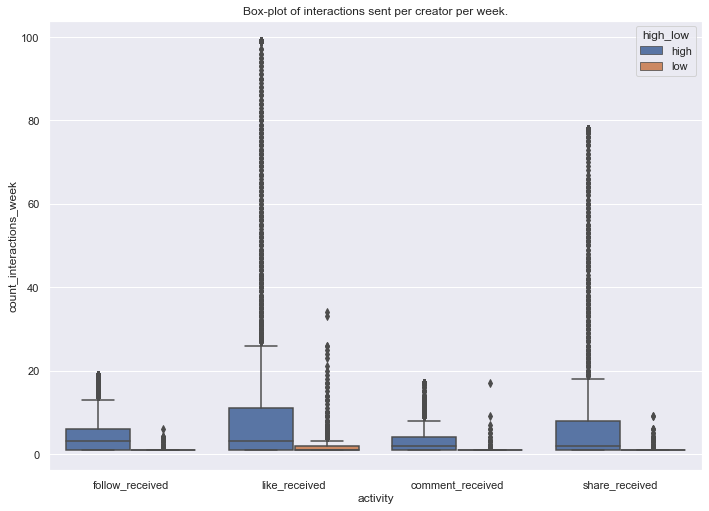

In [44]:
filter_val = ['follow_received', 'share_received', 'comment_received', 'like_received']
mask = winsor_general_reactions.activity.isin(filter_val)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data = winsor_general_reactions[mask],
             y = 'count_interactions_week',  
             x = 'activity',
             hue = 'high_low').set(title='Box-plot of interactions sent per creator per week.');

## Time series analysis

<font size = 4>The plots that follow are spaghetti plots: we want to check for distinct patterns in the line plots of 'high' and 'low' success creators. Successful creators do interact more than the others.</font>

In [76]:
def spaghetti(df, val):
    fig, ax = plt.subplots(figsize=(13, 8))
    mask_iter = df.activity == val
    
    for uid in df[mask_iter].user_id.unique():
        mask = (df[mask_iter].user_id == uid)
        
        d = df[mask_iter][mask] 
        x = d['week_yr'].values
        y = d['count_interactions_week'].values
        k = d['high_low'].values[0]
    
        if k == 'high':
            ax.plot(x, y, color="blue", lw=2.4, alpha = 0.1)
        else:
            ax.plot(x, y, color="red", lw=1.5, alpha = 1)
        ax.set_title('Analysis {} x Creator\'s success status.'.format(val))
        

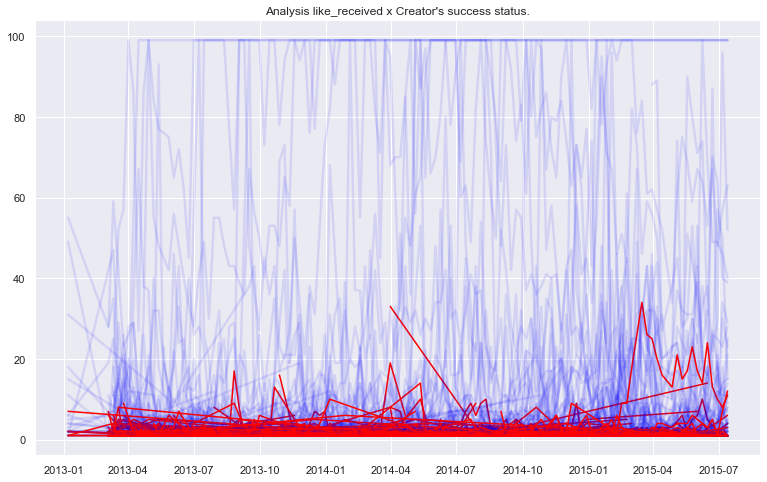

In [77]:
spaghetti(winsor_general_reactions, 'like_received')

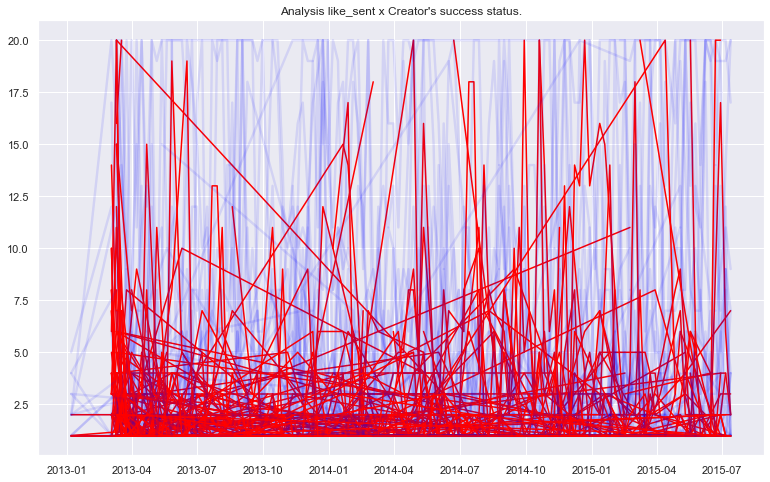

In [78]:
spaghetti(winsor_general_reactions, 'like_sent')

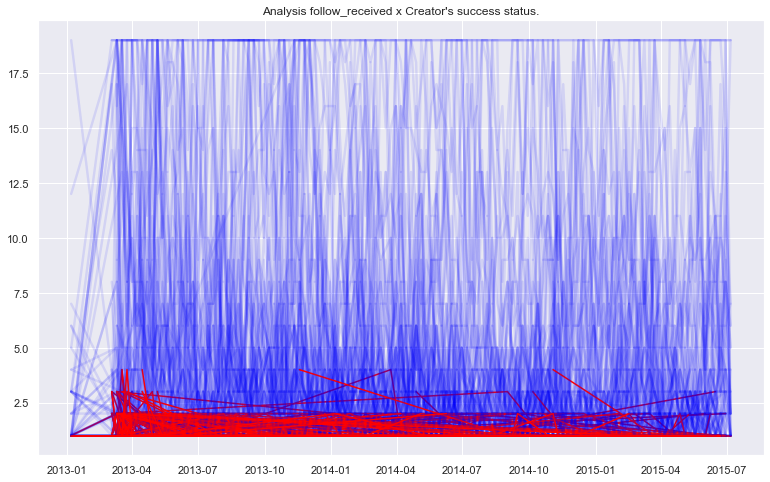

In [79]:
spaghetti(winsor_general_reactions, 'follow_received')

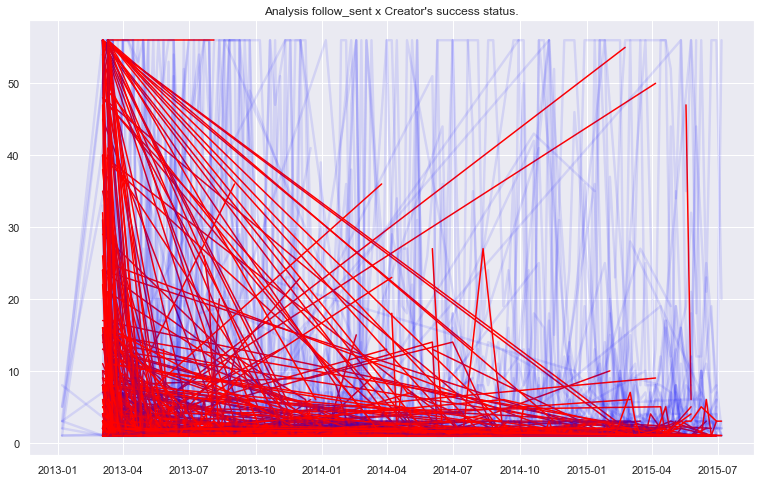

In [80]:
spaghetti(winsor_general_reactions, 'follow_sent')

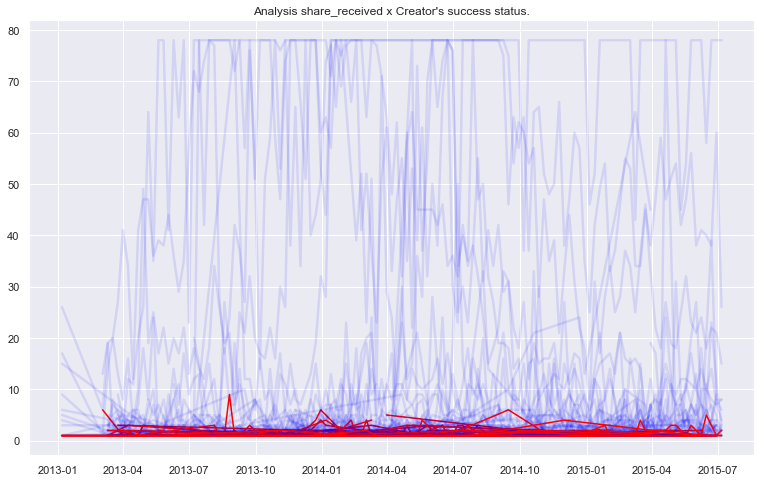

In [81]:
spaghetti(winsor_general_reactions, 'share_received')

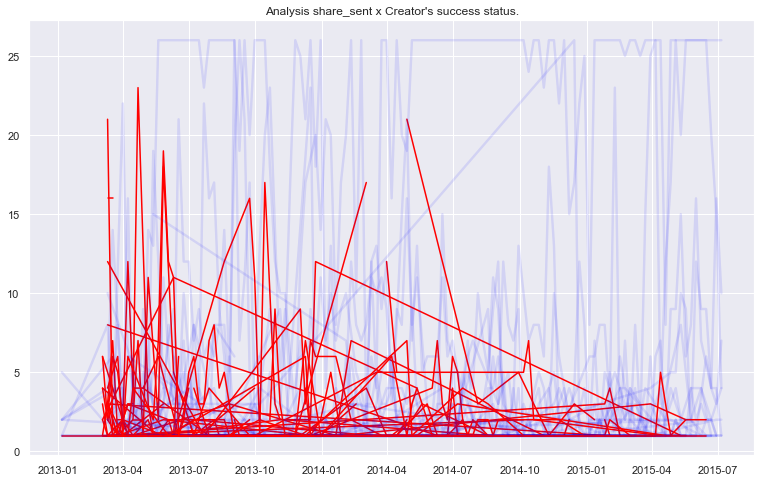

In [82]:
spaghetti(winsor_general_reactions, 'share_sent')

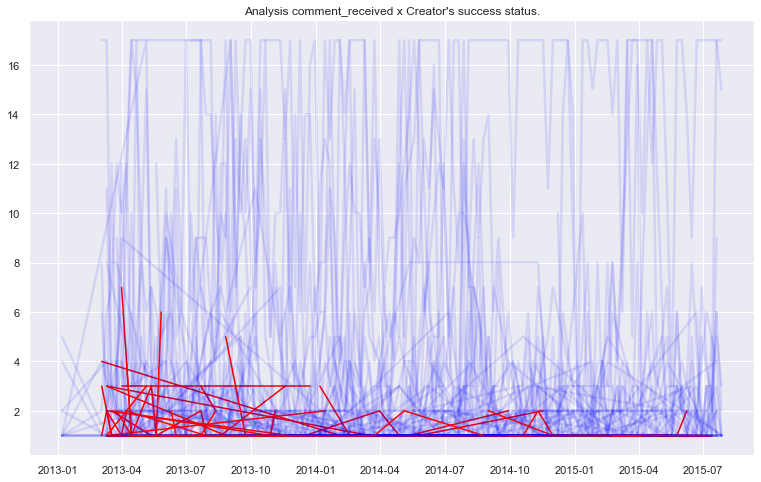

In [83]:
spaghetti(winsor_general_reactions, 'comment_received')

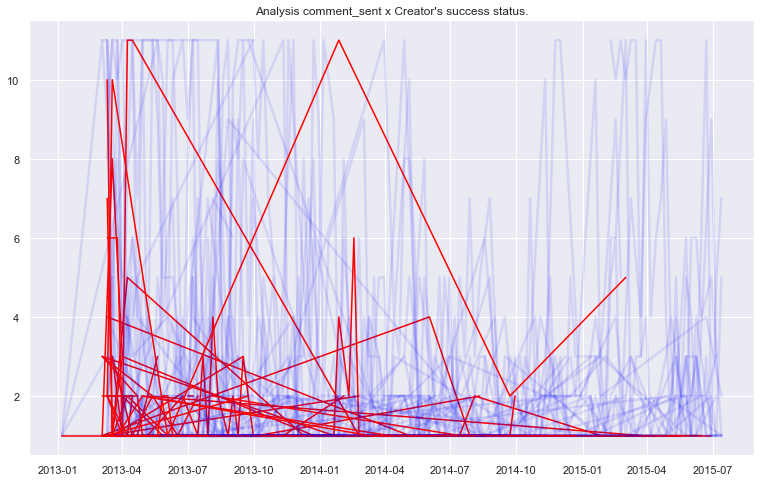

In [84]:
spaghetti(winsor_general_reactions, 'comment_sent')

# Reaction probability: weekly dynamics

<font size = 4>Now I present an analysis similar to the one shown shows in 27-07, but now the reaction probability is presented weekly.</font>

<font size = 4>The data is comprised of creators that made a track available in the first month and that are consider 'high' or 'low' in terms of success.</font>

In [54]:
df1_ = reaction_probability(999,follows_sent, shares_sent, likes_sent, comments_sent, tracks,\
                         follows_received, shares_received, likes_received, comments_received,\
                         diet_analysis = False, per_week = True)

Active date:2013-03-01 00:00:00
Interaction date:2013-03-01 00:00:00
Index(['index', 'user_id', 'fan_id', 'week_yr', 'avg_reaction_obtained'], dtype='object')


In [55]:
mask = df1_.user_id.isin(tracks_first_month.user_id) 
df1_ = df1_[mask]

In [56]:
df1_ = df1_.merge(followers_per_creator_60, left_on = 'user_id', right_on = 'user_id')

In [57]:
df1_filtered = filter_quantile(df1_, 0.1, 0.9)

High influencer boundary: 291.0
Low influencer boundary: 6.0


In [58]:
df1_filtered.loc[:,'month'] = pd.to_datetime(df1_filtered.week_yr.dt.to_period('M').astype(str))

/var/folders/f2/cgjzt69n5hlgmtsm36p1pztw0000gn/T/ipykernel_14343/1199994328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_filtered.loc[:,'month'] = pd.to_datetime(df1_filtered.week_yr.dt.to_period('M').astype(str))


In [59]:
def spaghetti_prob(df):
    fig, ax = plt.subplots(figsize=(15, 9))
    
    for uid in df.user_id.unique():
        mask = (df.user_id == uid)
        # Filter data to keep rows of the country
        d = df[mask] 
        x = d['month'].values
        y = d['avg_reaction_obtained'].values
        k = d['high_low'].values[0]
    
        
        if k == 'high':
            ax.plot(x, y, color="blue", lw=2.4, alpha = 0.3)
        else:
            ax.plot(x, y, color="red", lw=1.5, alpha = 0.3)
        ax.set_title('Time series: reaction probability per creator.')

In [60]:
df1_filtered.dtypes

user_id                           int32
week_yr                  datetime64[ns]
avg_reaction_obtained           float64
followers                         int64
high_low                         object
month                    datetime64[ns]
dtype: object

## Plots
<font size = 4>

The spaghetti plot indicates that, as we move ahead with our sample, the high success (blue lines) individuals mantain or enhance the reaction probability, while the low success (red lines) ones observe a decaying reaction probability. The scatter-plot strenghten that insight.
<br>
The third plot 'Line Plot: Reaction Probability per Month' shows that the high succes individuals mean reaction probability reaches its peak in the first month. Can that be due to creators becoming inactive after the first month?
</font>

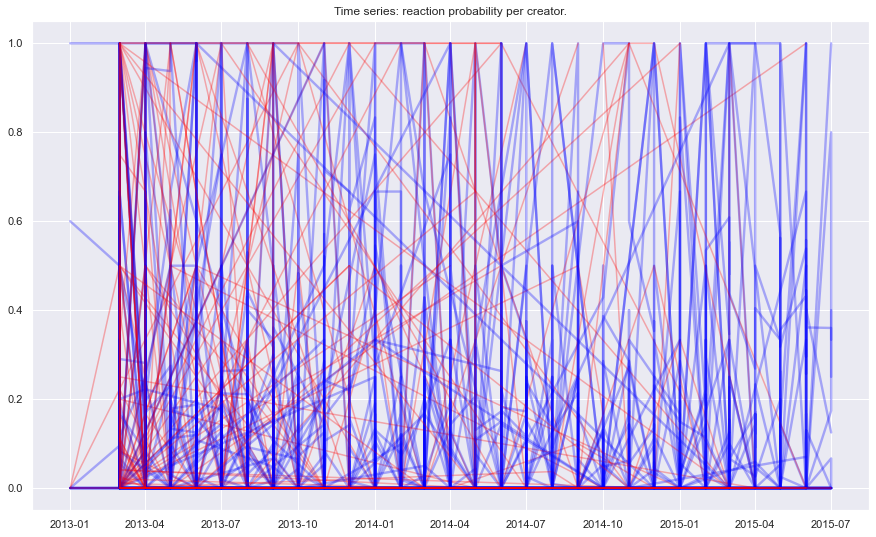

In [61]:
spaghetti_prob(df1_filtered)

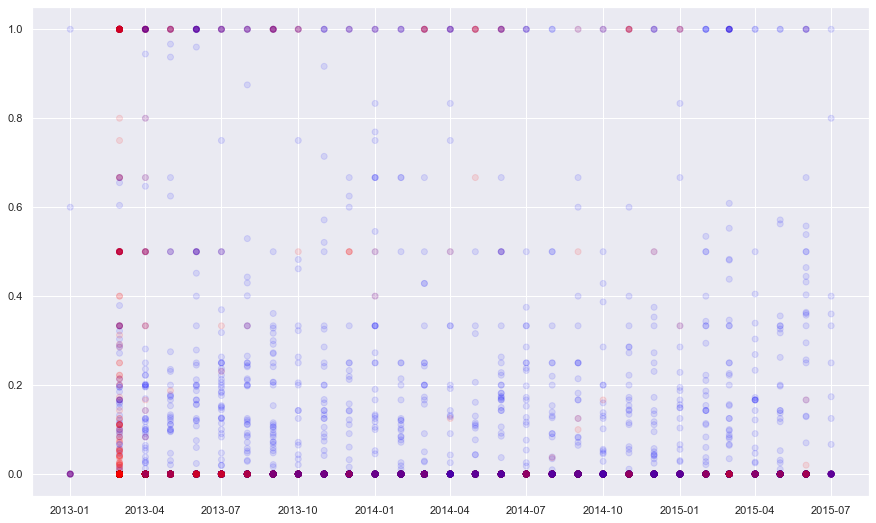

In [62]:
colors = {'high' : 'blue', 'low' : 'red' }

fig, ax = plt.subplots(figsize=(15, 9))
plt.scatter(x = df1_filtered['month'], y = df1_filtered['avg_reaction_obtained'], c = df1_filtered['high_low']\
            .map(colors), alpha = 0.1);

In [63]:
df1_2_categs = df1_filtered.groupby(['high_low', 'month'], as_index = False).agg(avg_reaction_obtained = ('avg_reaction_obtained','mean'))

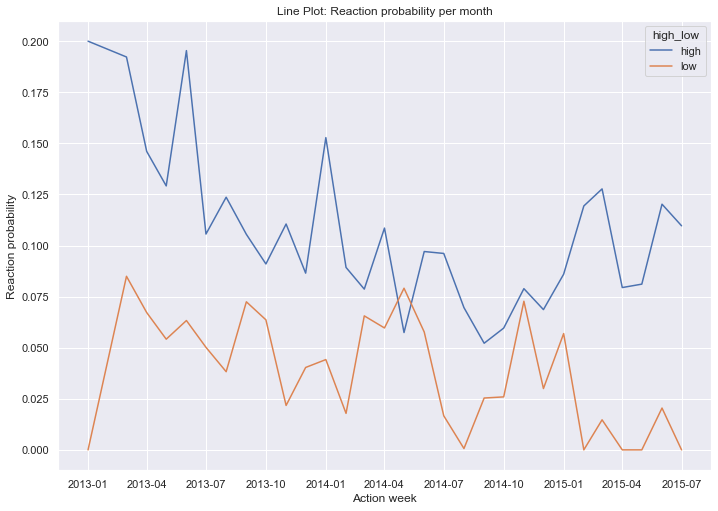

In [64]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=df1_2_categs, x="month", y="avg_reaction_obtained", hue="high_low")\
.set(xlabel = "Action week", ylabel = 'Reaction probability', title = 'Line Plot: Reaction probability per month');

## Fan base analysis

<font size = 4>When the analysis is restricted to fan base are very similar to the ones obtained above. The clear exception is the pooled time series, where there is a reverseal of the ordering of the reaction probability, where low success creators show a larger reaction probability. It is, indeed, worth noting that the number of observations decreases fast as we move forward in time.</font>

In [65]:
df1_filtered.week_yr.value_counts()

2013-03-11    422
2013-03-04    239
2013-03-18    103
2013-03-25     84
2013-04-01     77
             ... 
2015-06-01     23
2013-12-30     22
2015-07-13     22
2015-01-05     16
2013-01-07     12
Name: week_yr, Length: 125, dtype: int64

In [66]:
df2_ = reaction_probability(999,follows_sent, shares_sent, likes_sent, comments_sent, tracks,\
                         follows_received, shares_received, likes_received, comments_received,\
                         diet_analysis = False, per_week = True, fanbase_analysis = True)

Active date:2013-03-01 00:00:00
Interaction date:2013-03-01 00:00:00
Obtaining fanbase...
Index(['index', 'user_id', 'fan_id', 'week_yr', 'avg_reaction_obtained'], dtype='object')


In [67]:
mask = df2_.user_id.isin(tracks_first_month.user_id) 
df2_ = df2_[mask]

In [87]:
df2_ = df2_.merge(followers_per_creator_60, left_on = 'user_id', right_on = 'user_id')
df2_filtered = filter_quantile(df2_, 0.1, 0.9)
df2_filtered.loc[:,'month'] = pd.to_datetime(df2_filtered.week_yr.dt.to_period('M').astype(str))

High influencer boundary: 699.0
Low influencer boundary: 8.0


/var/folders/f2/cgjzt69n5hlgmtsm36p1pztw0000gn/T/ipykernel_14343/3017734550.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_filtered.loc[:,'month'] = pd.to_datetime(df2_filtered.week_yr.dt.to_period('M').astype(str))


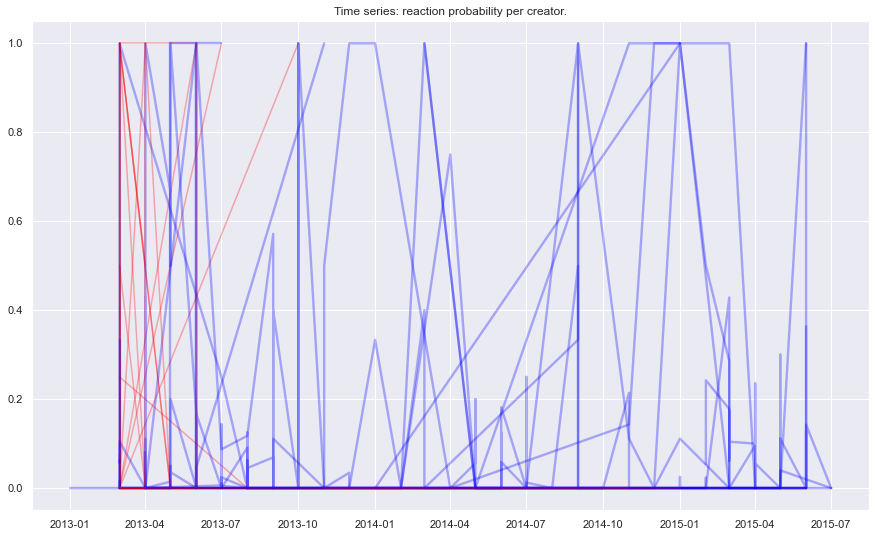

In [69]:
spaghetti_prob(df2_filtered)

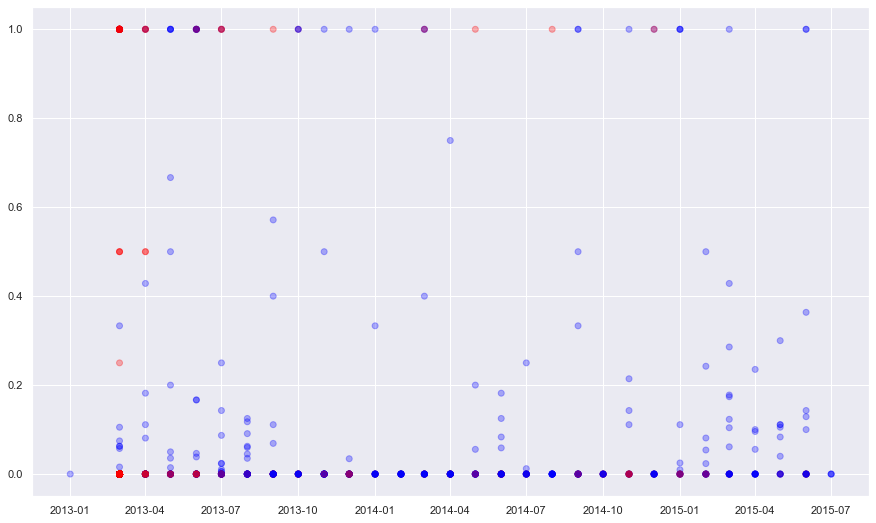

In [70]:
colors = {'high' : 'blue', 'low' : 'red' }

fig, ax = plt.subplots(figsize=(15, 9))
plt.scatter(x = df2_filtered['month'], y = df2_filtered['avg_reaction_obtained'], c = df2_filtered['high_low']\
            .map(colors), alpha = 0.3);

In [71]:
df2_2_categs = df2_filtered.groupby(['high_low', 'month'], as_index = False).agg(avg_reaction_obtained\
                                                                                   = ('avg_reaction_obtained','mean'))

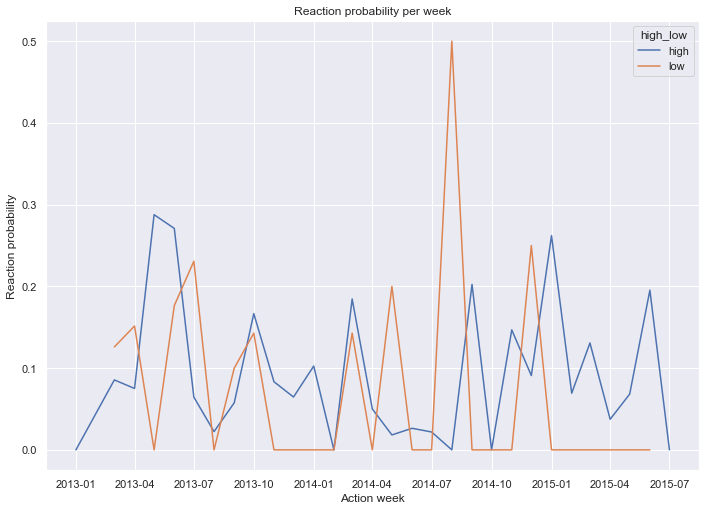

In [72]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=df2_2_categs, x="month", y="avg_reaction_obtained", hue="high_low")\
.set(xlabel = "Action week", ylabel = 'Reaction probability', title = 'Reaction probability per week');

Notes:
<br>
the number of observations per week decreases fast